IMPORTING LIBRARIES

In [72]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [ ]:
df=pd.read_csv("/content/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.tail()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park
99456,I232867,C273973,Female,36,Souvenir,3,35.19,Credit Card,15/10/2022,Mall of Istanbul


In [ ]:
df.shape

(99457, 10)

GENDER

In [ ]:
df['gender'].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

MONET SPENT BY RESPECTIVE GENDER

In [ ]:
males_total_money=df[df['gender']=='Male'].groupby("price")["price"].sum().sum()
males_total_money

27619564.29

In [ ]:
Females_total_money=df[df['gender']=='Female'].groupby("price")["price"].sum().sum()
Females_total_money

40931801.620000005

Hence, Females spent more money than male.

In [ ]:
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

Duplicate data checking

In [ ]:
print(df.duplicated().sum())

0


CATEGORY

In [ ]:
df['category'].value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

In [ ]:
df.nunique

<bound method DataFrame.nunique of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19   

      payment_method invoice_date     shopping_mall  
0        Credit Card     5/8/2022            Kanyon  
1         Debit Card   12/12/2021    Forum Istanbul  
2               Cash    9/11/2021         Metrocity  
3        Credit Card   16/05/2021      Metropol AVM  
4               Cash   24/10/2021            Kanyon  
...              ...          ...               ...  
99452    Credit Card   21/09/2022            Kanyon  
99453           Cash   22/09/2021    Forum Istanbul  
99454     Debit Card   28/03/2021         Metrocity  
99455           Cash   16/03/2021      Istinye Park  
99456    Credit Card   15/10/2022  Mall of Istanbul  

[99457 rows x 10 columns]>

DESCRIBING

In [ ]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


CLEANING OF THE DATA

number of null values in the data set

In [ ]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [ ]:
df.drop(columns='invoice_no',inplace=True)
df.head()

,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [ ]:
df.dtypes

customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [ ]:
df["gender"].value_counts()

Female    59482
Male      39975
Name: gender, dtype: int64

In [ ]:
len(df["customer_id"].unique())

99457

DATA EXPLORATION AND VISUALIZATION

number of products sold in different categories

In [ ]:
ages_buying_food=df[df["category"]=="Food & Beverage"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_food

age  age
37   37     326
43   43     322
36   36     309
51   51     308
24   24     307
23   23     307
33   33     305
52   52     303
66   66     303
61   61     302
48   48     296
57   57     295
62   62     293
20   20     292
64   64     291
19   19     290
31   31     289
45   45     289
30   30     289
21   21     288
40   40     288
34   34     287
39   39     287
41   41     287
22   22     286
32   32     286
67   67     284
65   65     283
58   58     283
38   38     282
18   18     281
56   56     280
42   42     279
54   54     279
68   68     278
27   27     277
50   50     276
49   49     274
26   26     274
44   44     273
35   35     272
29   29     272
28   28     269
55   55     268
60   60     264
59   59     263
46   46     263
63   63     261
25   25     255
69   69     255
53   53     253
47   47     253
Name: age, dtype: int64

In [ ]:
ages_buying_books=df[df["category"]=="Books"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_books

age  age
33   33     110
56   56     110
51   51     109
50   50     109
24   24     109
43   43     108
28   28     106
18   18     106
22   22     106
46   46     104
67   67     104
55   55     103
49   49     103
64   64     103
36   36     102
41   41     102
25   25     101
39   39      99
69   69      99
68   68      98
40   40      98
31   31      98
38   38      97
34   34      97
48   48      97
62   62      96
57   57      96
37   37      95
63   63      95
61   61      95
58   58      95
29   29      95
23   23      95
59   59      94
53   53      94
19   19      94
60   60      93
65   65      92
30   30      91
47   47      90
20   20      89
21   21      88
54   54      88
27   27      87
26   26      86
52   52      84
44   44      83
66   66      82
35   35      80
42   42      78
45   45      78
32   32      70
Name: age, dtype: int64

In [ ]:
ages_buying_clothes=df[df["category"]=="Clothing"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_clothes

age  age
22   22     735
37   37     724
64   64     717
43   43     714
48   48     713
27   27     700
28   28     694
19   19     687
24   24     684
39   39     684
38   38     684
44   44     683
30   30     683
46   46     682
40   40     680
60   60     679
68   68     676
52   52     675
51   51     674
61   61     668
21   21     667
67   67     666
50   50     662
26   26     662
56   56     661
35   35     660
59   59     660
32   32     659
47   47     658
42   42     656
57   57     654
63   63     654
25   25     651
69   69     650
29   29     650
18   18     646
62   62     644
53   53     643
66   66     643
20   20     641
49   49     638
58   58     638
33   33     638
31   31     637
54   54     635
41   41     634
34   34     631
36   36     630
55   55     629
23   23     626
45   45     622
65   65     606
Name: age, dtype: int64

In [ ]:
ages_buying_cosmetics=df[df["category"]=="Cosmetics"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_cosmetics

age  age
32   32     325
22   22     318
61   61     310
51   51     309
49   49     308
55   55     307
36   36     306
30   30     306
69   69     305
62   62     304
40   40     303
53   53     303
66   66     302
33   33     301
48   48     301
58   58     300
39   39     299
25   25     297
64   64     296
65   65     296
38   38     296
57   57     295
37   37     294
47   47     294
52   52     292
42   42     289
21   21     289
27   27     289
19   19     289
59   59     289
34   34     289
46   46     288
28   28     287
43   43     285
56   56     285
26   26     285
44   44     282
50   50     282
35   35     281
23   23     279
54   54     278
41   41     277
60   60     276
29   29     276
45   45     275
67   67     273
20   20     269
24   24     268
63   63     267
18   18     267
68   68     260
31   31     256
Name: age, dtype: int64

In [ ]:
ages_buying_shoes=df[df["category"]=="Shoes"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_shoes

age  age
63   63     220
51   51     214
62   62     211
31   31     210
45   45     208
19   19     207
26   26     207
29   29     205
36   36     205
24   24     204
47   47     204
53   53     203
23   23     202
37   37     202
46   46     199
66   66     198
21   21     198
20   20     197
55   55     196
58   58     196
41   41     195
48   48     194
50   50     194
27   27     194
33   33     193
44   44     191
43   43     191
59   59     191
64   64     191
40   40     190
65   65     190
61   61     190
39   39     189
60   60     188
22   22     188
69   69     187
35   35     187
30   30     187
34   34     186
28   28     186
54   54     185
49   49     185
67   67     184
57   57     183
42   42     183
25   25     183
68   68     181
52   52     180
32   32     173
38   38     172
18   18     171
56   56     166
Name: age, dtype: int64

In [ ]:
ages_buying_souvenir=df[df["category"]=="Souvenir"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_souvenir

age  age
56   56     115
63   63     112
26   26     111
36   36     110
60   60     108
18   18     108
53   53     107
38   38     107
40   40     106
31   31     105
59   59     104
24   24     103
22   22     103
21   21     103
41   41     103
32   32     103
43   43     102
44   44     101
30   30     101
45   45     100
27   27      99
34   34      99
37   37      99
67   67      98
65   65      98
58   58      97
25   25      96
69   69      96
62   62      95
54   54      95
64   64      93
48   48      93
29   29      92
33   33      92
57   57      92
52   52      89
68   68      88
35   35      88
51   51      88
42   42      88
49   49      87
61   61      87
46   46      87
23   23      86
19   19      86
47   47      85
50   50      84
66   66      84
20   20      83
39   39      83
55   55      80
28   28      80
Name: age, dtype: int64

In [ ]:
ages_buying_technology=df[df["category"]=="Technology"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_technology

age  age
38   38     121
22   22     116
30   30     115
37   37     115
42   42     112
64   64     112
60   60     111
65   65     110
51   51     109
46   46     105
24   24     105
34   34     104
53   53     104
28   28     104
25   25     103
40   40     102
52   52     101
35   35     100
45   45     100
44   44     100
36   36      99
39   39      99
49   49      98
43   43      97
68   68      97
66   66      96
27   27      95
41   41      95
61   61      93
69   69      92
29   29      91
57   57      91
56   56      90
21   21      90
33   33      90
32   32      90
18   18      89
26   26      87
48   48      87
31   31      86
19   19      86
50   50      86
67   67      86
47   47      85
23   23      85
58   58      84
54   54      84
55   55      83
62   62      83
63   63      81
20   20      77
59   59      75
Name: age, dtype: int64

In [ ]:
ages_buying_toys=df[df["category"]=="Toys"].groupby("age")["age"].value_counts().sort_values(ascending=False)
ages_buying_toys

age  age
28   28     227
21   21     224
52   52     221
23   23     217
69   69     217
68   68     215
47   47     211
56   56     209
27   27     209
30   30     209
42   42     207
39   39     207
67   67     206
45   45     204
29   29     204
37   37     202
61   61     200
41   41     199
22   22     199
64   64     199
59   59     198
24   24     197
19   19     197
53   53     196
20   20     196
63   63     196
38   38     195
36   36     193
40   40     193
44   44     191
34   34     190
49   49     190
54   54     186
31   31     185
32   32     185
26   26     184
33   33     184
46   46     183
62   62     183
51   51     182
58   58     182
43   43     181
65   65     181
50   50     180
55   55     177
25   25     177
18   18     176
48   48     174
57   57     173
35   35     173
66   66     168
60   60     155
Name: age, dtype: int64

In [ ]:
df.groupby(["category"]).agg({"quantity":np.sum}).reset_index()

,category,quantity
0,Books,14982
1,Clothing,103558
2,Cosmetics,45465
3,Food & Beverage,44277
4,Shoes,30217
5,Souvenir,14871
6,Technology,15021
7,Toys,30321


In [ ]:
malls=df["shopping_mall"].value_counts()
malls

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

In [ ]:
fif=fig=px.bar(malls,template="plotly_dark",title="Different Malls",color=malls.values,y=malls.values,x=malls.index,labels={"y":"Number of Customers in the mall"})

In [ ]:
fig.show()

In [ ]:
payment_method=df["payment_method"].value_counts()
payment_method

Cash           44447
Credit Card    34931
Debit Card     20079
Name: payment_method, dtype: int64

In [ ]:
fig=px.pie(values=payment_method,names=payment_method.index,template="plotly_dark",title="Different Payment Methods")
fig.show()

In [ ]:
df["price"].value_counts()

600.16     6950
1500.40    6940
900.24     6907
1200.32    6849
300.08     6841
121.98     3072
203.30     3055
162.64     3010
5.23       3002
15.69      2992
26.15      2989
40.66      2986
81.32      2974
10.46      2909
20.92      2884
107.52     2082
143.36     2076
1200.34    2045
2400.68    2022
3000.85    2013
1800.51    2010
35.84      2000
179.20     1971
71.68      1958
600.17     1944
35.19      1077
75.75      1029
11.73      1024
3150.00    1009
30.30      1008
4200.00    1001
5250.00    1001
2100.00    1000
45.45      1000
58.65       992
15.15       985
1050.00     985
23.46       984
60.60       959
46.92       922
Name: price, dtype: int64

In [ ]:
fig=px.box(x=df["price"],labels={"x":"price"},template="plotly_dark",title="5-Number-Summary(Box Plot) of Price")
fig.show()

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd

In [ ]:
ages_buying_shoes.head()

age  age
63   63     220
51   51     214
62   62     211
31   31     210
45   45     208
Name: age, dtype: int64

In [ ]:
type(ages_buying_shoes.index)

pandas.core.indexes.multi.MultiIndex

In [ ]:
!pip install plotly_express

In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
print(ages_buying_shoes)

age  age
63   63     220
51   51     214
62   62     211
31   31     210
45   45     208
19   19     207
26   26     207
29   29     205
36   36     205
24   24     204
47   47     204
53   53     203
23   23     202
37   37     202
46   46     199
66   66     198
21   21     198
20   20     197
55   55     196
58   58     196
41   41     195
48   48     194
50   50     194
27   27     194
33   33     193
44   44     191
43   43     191
59   59     191
64   64     191
40   40     190
65   65     190
61   61     190
39   39     189
60   60     188
22   22     188
69   69     187
35   35     187
30   30     187
34   34     186
28   28     186
54   54     185
49   49     185
67   67     184
57   57     183
42   42     183
25   25     183
68   68     181
52   52     180
32   32     173
38   38     172
18   18     171
56   56     166
Name: age, dtype: int64


In [ ]:

print(type(ages_buying_shoes))

<class 'pandas.core.series.Series'>


In [ ]:
for i in df['category'].unique():
  print(i)
  print('male:',len(df[(df['category']==i)&(df['gender']=='Male')]))
  print('female:',len(df[(df['category']==i)&(df['gender']=='Female')]))
  print('--------------')


Clothing
male: 13835
female: 20652
--------------
Shoes
male: 4067
female: 5967
--------------
Books
male: 2075
female: 2906
--------------
Cosmetics
male: 6027
female: 9070
--------------
Food & Beverage
male: 5972
female: 8804
--------------
Toys
male: 4002
female: 6085
--------------
Technology
male: 2015
female: 2981
--------------
Souvenir
male: 1982
female: 3017
--------------


In [ ]:
pd.crosstab(df['gender'],df['category'],values=df['age'],aggfunc=np.average)

category,Books,Clothing,Cosmetics,Food & Beverage,Shoes,Souvenir,Technology,Toys
gender,,,,,,,,
Female,43.455609,43.381948,43.571665,43.489209,43.532261,43.433543,43.249581,43.500247
Male,43.662651,43.449946,43.594160,43.155727,43.341529,43.331483,43.544417,43.061719


In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total sales of products')

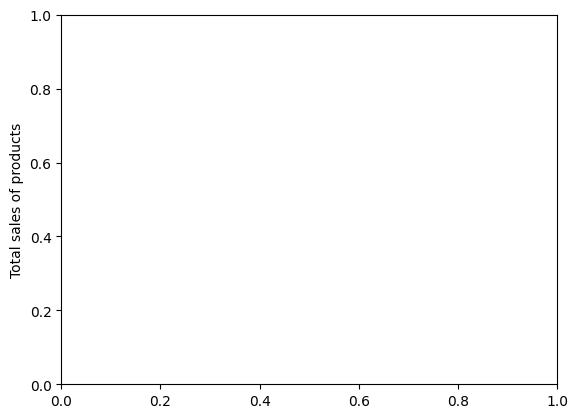

In [ ]:
plt.ylabel('Total sales of products')

In [ ]:
plt.show()

The average we got when we compare is 43

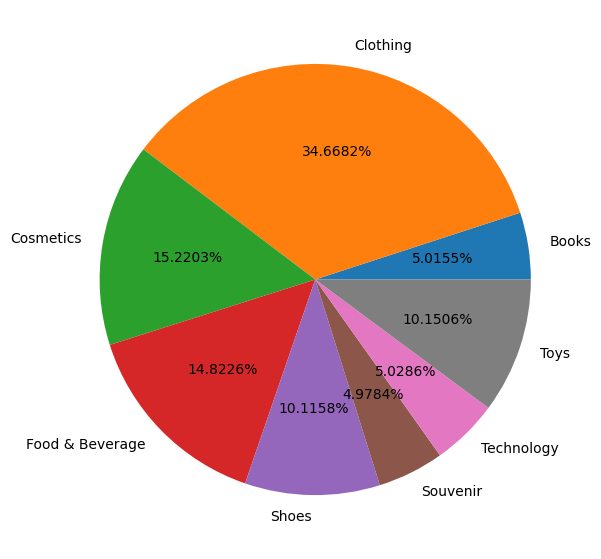

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylabels'

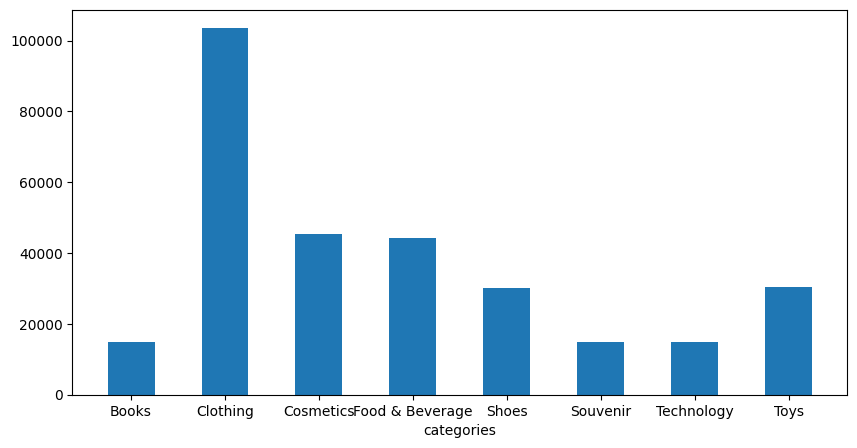

In [ ]:
df=df.groupby(['category']).agg({'quantity':np.sum}).reset_index()
fig1=plt.figure(figsize=(10,7))
plt.pie(df.quantity,labels=df.category,autopct='%1.4f%%')
plt.show()
fig2=plt.figure(figsize=(10,5))
plt.bar(df.category,df.quantity,width=0.5)
plt.xlabel('categories')
plt.ylabels("Total sales of products")
plt.show

**Analysis**: From the above figure 1 and figure 2 we can conclude that most of the quality sold was clothing with cosmetics and food and beverages following next to clothing. The least sold was souvenir

<function matplotlib.pyplot.show(close=None, block=None)>

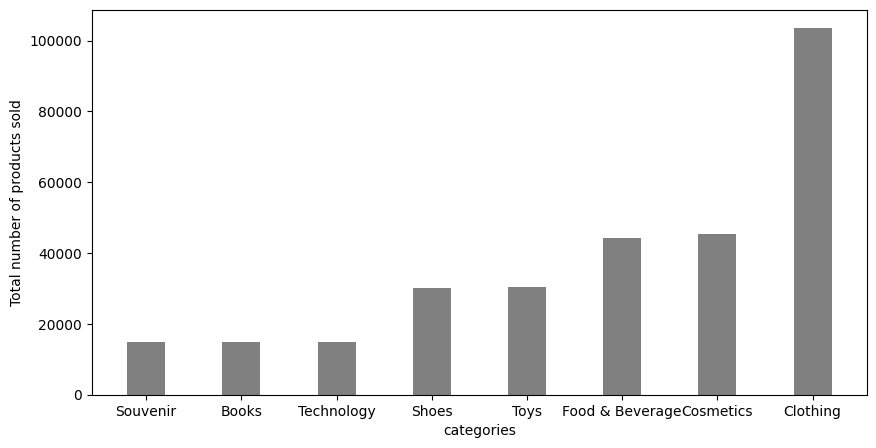

In [ ]:
df=df.sort_values('quantity')
fig2=plt.figure(figsize=(10,5))
plt.bar(df.category,df.quantity,color='gray',width=0.4)
plt.xlabel('categories')
plt.ylabel("Total number of products sold")
plt.show

In [ ]:
df['quantity'].value_counts()

14871     1
14982     1
15021     1
30217     1
30321     1
44277     1
45465     1
103558    1
Name: quantity, dtype: int64

In [ ]:
fig=px.box(x=df['quantity'],
           labels={'x':'quantity'},
           template='plotly_dark',
           title="5-Number-Summery(Box Plot) of quantity")
fig.show()